In [0]:
import sys, tweepy
import textblob
import matplotlib.pyplot as plt
import pandas as pd
import twint
from googletrans import Translator
from datetime import date, timedelta


In [0]:
pip install twint

In [0]:
pip install googletrans

In [0]:
#define some function
def percent(part, total):
    return 100*float(part)/float(total)

In [0]:
#input keyword and desired number of tweets , prepare csv
keyword = str(input("Please input keyword: "))
number = int(input("Number of tweets: "))
date_end  = str(input("end date (yyyy-mm-dd ):"))
date_start  = str(input("start date (yyyy-mm-dd ):"))

c = twint.Config()
c.Until = date_end
c.Since = date_start
c.Search = keyword
c.Lang = "id"
c.Pandas_clean = True
c.Debug = True
c.Limit = number
c.Pandas = True
c.Count = True
c.Hide_output = True
c.Filter_retweets = True

twint.run.Search(c)
Tweets_df = twint.storage.panda.Tweets_df

Please input keyword: thanos
Number of tweets: 20
Release date (yyyy-mm-dd ):2016-12-7


CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)
CRITICAL:root:twint.run:Twint:Feed:noDataExpecting value: line 1 column 1 (char 0)


[+] Finished: Successfully collected 1 Tweets.


<function matplotlib.pyplot.show>

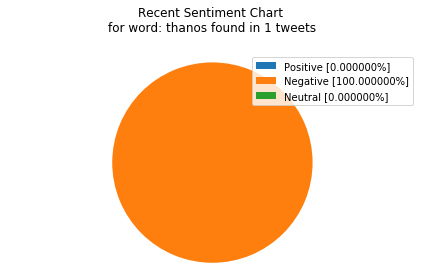

In [0]:
def sentiment(string):
  string = Translator().translate(string, src='id', dest='en')
  analysis = textblob.TextBlob(string.text)
  sentiment = ""
  ##if(analysis.sentiment.polarity==0):
  ##      sentiment = "neutral"
  if(analysis.sentiment.polarity<0.0000):
        sentiment = "negative"
  elif(analysis.sentiment.polarity>0.0000):
        sentiment = "positive"
  return sentiment

sentiment_analysis = [sentiment(x) for x in Tweets_df['tweet']]

perPositive = format(percent(sentiment_analysis.count("positive"), int(Tweets_df.shape[0])),'02f')
perNegative = format(percent(sentiment_analysis.count("negative"), int(Tweets_df.shape[0])),'02f')
perNeutral = format(percent(sentiment_analysis.count("neutral"), int(Tweets_df.shape[0])),'02f')

sizes = [perPositive, perNegative, perNeutral]
labels = ['Positive [' + str(perPositive) + '%]','Negative [' + str(perNegative) + '%]','Neutral [' + str(perNeutral) + '%]']
p, t = plt.pie(sizes, startangle=90)
plt.title("Recent Sentiment Chart \nfor word: "+keyword+" found in "+str(int(Tweets_df.shape[0]))+ " tweets\n")
plt.axis("equal")
plt.legend(p, labels,loc="best")
plt.tight_layout()
plt.show
